# ハイパーパラメーターとチューニング(2)

- **[3.1 決定木のハイパーパラメーター](#3.1-決定木のハイパーパラメーター)**
    - **[3.1.1 パラメーター-max_depth](#3.1.1-パラメーター-max_depth)**
    - **[3.1.2 パラメーター-random_state](#3.1.2-パラメーター-random_state)**
<br><br>
- **[3.2 ランダムフォレストのハイパーパラメーター](#3.2-ランダムフォレストのハイパーパラメーター)**
    - **[3.2.1 パラメーター-n_estimators](#3.2.1-パラメーター-n_estimators)**
    - **[3.2.2 パラメーター-max_depth](#3.2.2-パラメーター-max_depth)**
    - **[3.2.3 パラメーター-random_state](#3.2.3-パラメーター-random_state)**
<br><br>
- **[3.3 k-NNのハイパーパラメーター](#3.3-k-NNのハイパーパラメーター)**
    - **[3.3.1 パラメーター-n_neighbors](#3.3.1-パラメーター-n_neighbors)**
<br><br>
- **[3.4 チューニングの半自動化](#3.2-チューニングの半自動化)**
    - **[3.4.1 グリッドサーチ](#3.2.1-グリッドサーチ)**
    - **[3.4.2 ランダムサーチ](#3.2.2-ランダムサーチ)**
<br><br>
- **[3.5 添削問題](#3.5-添削問題)**

***

## 3.1 決定木のハイパーパラメーター

### 3.1.1 パラメーター max_depth

 `max_depth` は学習時にモデルが学習する木の深さの最大値を表すパラメーターです。

 `max_depth`の値が設定されていない時、木は教師データの分類がほぼ終了するまでデータを分割します。

このため教師データを過剰に信頼し学習した一般性の低いモデルとなってしまいます。

また、値が大きすぎても同じように分類が終了した段階で木の成長は止まるので上記の状態と同じになります。
    
`max_depth` を設定し木の高さを制限することを決定木の枝刈りと呼びます。

#### 問題

- 決定木のmax_depthの違いによる分類の正解率をグラフで表してみましょう。
- `depth_list` というリストが渡されますので、`max_depth` に `depth_list` 内の値を順次代入しテスト用データの正解率を出し、`max_depth` との関係をプロットしたグラフを出力してください。

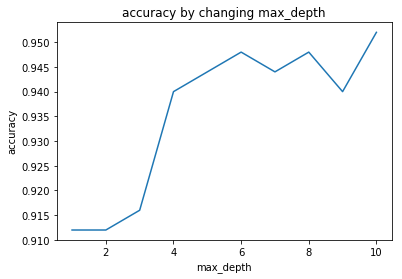

In [1]:
# モジュールのインポート
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

# データの生成
X, y = make_classification(
    n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# max_depthの値の範囲(1から10)
depth_list = [i for i in range(1, 11)]

# 正解率を格納するからリストを作成
accuracy = []

# 以下にコードを書いてください
# max_depthを変えながらモデルを学習
for max_depth in depth_list:
#ここに答えを書いてください
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))


# コードの編集はここまでです。

# グラフのプロット
plt.plot(depth_list, accuracy)
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("accuracy by changing max_depth")
plt.show()

#### ヒント

- for文を使ってdepth_listの要素を取り出します。
- max_depthのチューニングはモデル構築時に行います。以下のコードも参照してください。  
`model = DecisionTreeClassifier(max_depth=1, random_state=42)`

#### 解答例

In [ ]:
# モジュールのインポート
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

# データの生成
X, y = make_classification(
    n_samples=1000, n_features=5, n_informative=3, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# max_depthの値の範囲(1から10)
depth_list = [i for i in range(1, 11)]

# 正解率を格納するからリストを作成
accuracy = []

# 以下にコードを書いてください
# max_depthを変えながらモデルを学習
for max_depth in depth_list:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))

# コードの編集はここまでです。
# グラフのプロット
plt.plot(depth_list, accuracy)
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("accuracy by changing max_depth")
plt.show()

***

### 3.1.2 パラメーター random_state

 `random_state` は学習結果の保持だけではなく、決定木の学習過程に直接関わるパラメーターです。

決定木の分割は分割を行う時点でよくデータの分類を説明できる要素の値を見つけ、データの分割を行うのですが、そのような値の候補はたくさん存在するため、 `random_state` による乱数の生成により、その候補を決めています。
    

#### 問題

- random_stateは決定木においてどのようなパラメーターでしょうか。
- 次の選択肢から選んでください。

1. 決定木を分割する値を決定する。
1. 学習結果の保持を行う。
1. 学習に用いる乱数を生成するための値を設定する。
1. 上記の全て

#### ヒント

- 決定木では学習結果の保持以外にも乱数を生成して決定するものがあります。

#### 解答

上記の全て

***

## 3.2 ランダムフォレストのハイパーパラメーター

### 3.2.1 パラメーター n_estimators

ランダムフォレストの特徴として **複数の簡易決定木による多数決で結果が決定される** というものが挙げられますが、その簡易決定木の個数を決めるのがこの `n_estimators` というパラメーターです。

#### 問題

- RandomForestの `n_estimators` の違いによる分類の正解率をグラフで表してみましょう。
- `n_estimators_list` というリストが渡されますので、`n_estimators` に` n_estimators_list` 内の値を順次代入しテスト用データの正解率を出し、`n_estimators` との関係をプロットしたグラフを出力してください。

In [ ]:
# モジュールのインポート
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

# データの生成
X, y = make_classification(
    n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# n_estimatorsの値の範囲(1から20)
n_estimators_list = [i for i in range(1, 21)]

# 正解率を格納するからリストを作成
accuracy = []

# for文内にコードを書いてください
# n_estimatorsを変えながらモデルを学習
for n_estimators in n_estimators_list:




# グラフのプロット
plt.plot(n_estimators_list, accuracy)
plt.title("accuracy by n_estimators increasement")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.show()

#### ヒント

- for文を使ってn_estimators_listの要素を取り出します。
- n_estimatorsのチューニングはモデル構築時に行います。以下のコードも参照してください。  
`model = RandomForestClassifier(n_estimators=1, random_state=42)`

#### 解答例

In [ ]:
# モジュールのインポート
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

# データの生成
X, y = make_classification(
    n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# n_estimatorsの値の範囲(1から20)
n_estimators_list = [i for i in range(1, 21)]

# 正解率を格納するからリストを作成
accuracy = []

# 以下にコードを書いてください
# n_estimatorsを変えながらモデルを学習
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))

# グラフのプロット
plt.plot(n_estimators_list, accuracy)
plt.title("accuracy by n_estimators increasement")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.show()

***

### 3.2.2 パラメーター max_depth

ランダムフォレストは簡易決定木を複数作るので決定木に関するパラメーターを設定することが可能です。
    
max_depthは決定木に関するパラメーターですが、ランダムフォレストにおいては **通常の決定木より小さな値を入力します**

簡易決定木の分類の多数決というアルゴリズムであるため一つ一つの決定木に対して厳密な分類を行うより着目要素を絞り俯瞰的に分析を行うことで学習の効率の良さと高い精度を保つことができます。

#### 問題

なぜランダムフォレストでは決定木より `max_depth` を小さく設定するのでしょうか。
以下の選択肢より選んでください。

1. ランダムフォレストが決定木ほど厳密なモデルではないため。
1. max_depthによって予測結果が変わることがないため。
1. 教師データに対する過剰な学習を防ぐため。
1. max_depthは多数決に寄与するパラメーターであるため。

#### ヒント

- max_depthは決定木の過学習を防ぐためのパラメーターです。
- ランダムフォレストは予測精度向上のため複数の決定木を作成しその決定木の多数決で決めるモデルです。

#### 解答

教師データに対する過剰な学習を防ぐため。

***

### 3.2.3 パラメーター random_state

`random_state` はランダムフォレストにおいても重要なパラメーターです。

ランダムフォレストの名前の通り結果の固定のみならず、決定木のデータの分割や用いる要素の決定など多くの場面で乱数が寄与するこの手法ではこのパラメーターによって分析結果が大きく異なります。


#### 問題

- ランダムフォレストのrandom_stateの違いによる分類の正解率をグラフで表してみましょう。
- `r_seeds`というリストが渡されますので、`random_state`に`r_seeds`内の値を順次代入しテスト用データの正解率を出し、`random_state`との関係をプロットしたグラフを出力してください。

In [ ]:
# モジュールのインポート
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

# データの生成
X, y = make_classification(
    n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# r_seedsの値の範囲(0から99)
r_seeds = [i for i in range(100)]

# 正解率を格納するからリストを作成
accuracy = []

# 以下にコードを書いてください
# random_stateを変えながらモデルを学習
#ここに答えを書いてください



# グラフのプロット
plt.plot(r_seeds, accuracy)
plt.xlabel("seed")
plt.ylabel("accuracy")
plt.title("accuracy by changing seed")
plt.show()

#### ヒント

- for文を使ってr_seedsの要素を取り出します。
- random_stateのチューニングはモデル構築時に行います。以下のコードも参照してください。  
`model = RandomForestClassifier(random_state=42)`

#### 解答例

In [ ]:
# モジュールのインポート
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

# データの生成
X, y = make_classification(
    n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# r_seedsの値の範囲(0から99)
r_seeds = [i for i in range(100)]

# 正解率を格納するからリストを作成
accuracy = []

# 以下にコードを書いてください

# random_stateを変えながらモデルを学習
for seed in r_seeds:
    model = RandomForestClassifier(random_state=seed)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))

# グラフのプロット
plt.plot(r_seeds, accuracy)
plt.xlabel("seed")
plt.ylabel("accuracy")
plt.title("accuracy by changing seed")
plt.show()

***

## 3.3 k-NN

### 3.3.1 パラメーター n_neighbors

`n_neighbors` はk-NNのkの値のことです。
つまり、結果予測の際に使う類似データの個数を決めるパラメーターです。
    
`n_neighbors` の数が多すぎると類似データとして選ばれるデータの類似度に幅が出るため、分類範囲の狭いカテゴリーがうまく分類されないということが起こります。

#### 問題

- k-NNの`n_neighbors`の違いによる分類の正解率をグラフで表してみましょう。
- `k_list`というリストが渡されますので、`n_neighbors`に`k_list`内の値を順次代入しテスト用データの正解率を出し、`n_neighbors`との関係をプロットしたグラフを出力してください。

In [ ]:
# モジュールのインポート
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

# データの生成
X, y = make_classification(
    n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# n_neighborsの値の範囲(1から10)
k_list = [i for i in range(1, 11)]

# 正解率を格納するからリストを作成
accuracy = []

# 以下にコードを書いてください
# n_neighborsを変えながらモデルを学習
for k in k_list:
#ここに答えを書いてください



#コードの編集は以上です

# グラフのプロット
plt.plot(k_list, accuracy)
plt.xlabel("n_neighbor")
plt.ylabel("accuracy")
plt.title("accuracy by changing n_neighbor")
plt.show()

#### ヒント

- for文を使ってk_listの要素を取り出します。
- n_neighborsのチューニングはモデル構築時に行います。以下のコードも参照してください。  
`model = KNeighborsClassifier(n_neighbors=1)`

#### 解答例

In [ ]:
# モジュールのインポート
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

# データの生成
X, y = make_classification(
    n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# n_neighborsの値の範囲(1から10)
k_list = [i for i in range(1, 11)]

# 正解率を格納するからリストを作成
accuracy = []

# 以下にコードを書いてください

# n_neighborsを変えながらモデルを学習
for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))

# グラフのプロット
plt.plot(k_list, accuracy)
plt.xlabel("n_neighbor")
plt.ylabel("accuracy")
plt.title("accuracy by changing n_neighbor")
plt.show()

## 3.4 チューニングの自動化 

### 3.4.1 グリッドサーチ

これまで主要な手法の中でよく使われるパラメーターを紹介してきました。
しかしこれら全てのパラメーターを都度変えて結果を確認するのは時間と手間がかかります。
    
そこで、パラメーターの範囲を指定して一番結果の良かったパラメーターセットを計算機に見つけてもらうという方法を使います。
主な方法は2つ、グリッドサーチとランダムサーチです。
    
グリッドサーチは調整したいハイパーパラメーターの値の候補を明示的に複数指定し、パラメーターセットを作成し、その時のモデルの評価を繰り返すことでモデルとして最適なパラメーターセットを作成するために用いられる方法です。
    
値の候補を明示的に指定するためパラメーターの値に文字列や整数、True or Falseといった数学的に連続ではない値をとるパラメーターの探索に向いています。
ただしパラメーターの候補を網羅するようにパラメーターセットが作成されるため多数のパラメーターを同時にチューニングするのには不向きです。
    
コードは以下のようになります。
プログラムの実行には時間がかかりますのでご注意ください。
    
```python
import scipy.stats
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

data = load_digits()
train_X, test_X, train_y, test_y = train_test_split(data.data, data.target, random_state=42)

# パラメーターの値の候補を設定
model_param_set_grid = {SVC(): {"kernel": ["linear", "poly", "rbf", "sigmoid"],
                                "C": [10 ** i for i in range(-5, 5)],
                                "decision_function_shape": ["ovr", "ovo"],
                                "random_state": [42]}}
              
max_score = 0
best_param = None

# グリッドサーチでパラメーターサーチ
for model, param in model_param_set_grid.items():
    clf = GridSearchCV(model, param)
    clf.fit(train_X, train_y)
    pred_y = clf.predict(test_X)
    score = f1_score(test_y, pred_y, average="micro")
    if max_score < score:
        max_score = score
        best_model = model.__class__.__name__
        best_param = clf.best_params_
                        
print("パラメーター:{}".format(best_param))
print("ベストスコア:",max_score)
svm = SVC()
svm.fit(train_X, train_y)
print()
print('調整なし')
print(svm.score(test_X, test_y))
```

#### 問題

- 次のうちグリッドサーチの特徴ではないものを選択してください。

1. 値の候補を列挙し、パラメーターサーチをする手法の一つ。
1. 候補となる値を全てパラメーターとして試し、一番学習精度の良いモデルを返す。
1. 実行に時間がかかる。
1. パラメーターサーチとしては唯一の手法である。

#### ヒント

- 値の候補を逐次的に全探索するため実行に時間がかかります。
- パラメーターサーチの目的はモデルの予測精度が高くなるようなパラメーターを見つけることです。

#### 解答

パラメーターサーチとしては唯一の手法である。

***

### 3.4.2 ランダムサーチ

グリッドサーチは値の候補を指定してその上でパラメーターを調整しました。

ランダムサーチはパラメーターが取りうる値の範囲を指定し、確率で決定されたパラメーターセットを用いてモデルの評価を行うことを繰り返すことによって最適なパラメーターセットを探す方法です。

値の範囲の指定はパラメーターの確率関数を指定するというものになります。
    

パラメーターの確率関数としてscipy.statsモジュールの確率関数がよく用いられます。

コードは以下の通りです。
```python
import scipy.stats
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

data = load_digits()
train_X, test_X, train_y, test_y = train_test_split(data.data, data.target, random_state=42)

# パラメーターの値の候補を設定
model_param_set_random =  {SVC(): {
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "C": scipy.stats.uniform(0.00001, 1000),
        "decision_function_shape": ["ovr", "ovo"],
        "random_state": scipy.stats.randint(0, 100)
    }}

max_score = 0
best_param = None

# ランダムサーチでパラメーターサーチ
for model, param in model_param_set_random.items():
    clf = RandomizedSearchCV(model, param)
    clf.fit(train_X, train_y)
    pred_y = clf.predict(test_X)
    score = f1_score(test_y, pred_y, average="micro")
    if max_score < score:
        max_score = score
        best_param = clf.best_params_
        
print("パラメーター:{}".format(best_param))
print("ベストスコア:",max_score)
svm = SVC()
svm.fit(train_X, train_y)
print()
print('調整なし')
print(svm.score(test_X, test_y))
```


#### 問題

- 次のうちランダムサーチについて説明している文章はどれでしょうか。

1. データをランダムに学習し、モデルの精度を上げる方法。
1. パラメーターの範囲を設定し、範囲内でランダムに値を選択することでモデルの予測精度を向上させる手法。
1. 使用するハイパーパラメーターをランダムに決定しモデルの予測精度を向上させる方法。
1. モデルの予測結果をランダムに変更することで予測精度を上げる方法。

#### ヒント

- パラメーターサーチの目的はモデルの予測精度を向上させるようなハイパーパラメーターの値を決定することにあります。

#### 解答

パラメーターの範囲を設定し、範囲内でランダムに値を選択することでモデルの予測精度を向上させる手法。

***

### 3.4.3 モデルに基づくハイパーパラメータの最適化

　ニューラルネットは基本的に勾配法（最急降下法）と呼ばれる方法で、損失関数を減少させる方向に少しずつ進んでいきます。通常ニューラルネットには多くの鞍点（擬似的な解）があり、鞍点にハマってしまうと勾配が0になり動けなくなるため、本来の解に辿り付けません。
 
　よって、勾配法は様々な改良された手法が生み出されています。損失関数に対して万能な最適化法など存在しません。（ノーフリーランチ定理）また、損失関数はタスクやデータに応じて変わるため、最適化は理論より先に試していく必要もあります。

#### 問題

- 次のうちハイパーパラメータ調整の難点を正しく説明している文章はどれでしょうか。

1. 最適なハイパーパラメータは勾配法（最急降下法）を用いれば必ず見つかる。
1. ニューラルネットには多くの鞍点があり、鞍点の傾きは負である。
1. 損失関数はタスクやデータに応じて変わるため、どの手法を使うかは試して決める必要がある。
1. 勾配法を改良した最も良い最適化法が存在するので、一般にそれが使われる。

#### ヒント

- ニューラルネットワークは鞍点が存在するため、勾配法では学習が停滞することがあります。

#### 解答

パラメーターの範囲を設定し、範囲内でランダムに値を選択することでモデルの予測精度を向上させる手法。

***

## 3.5 添削問題

グリッドサーチやランダムサーチは時間こそかかりますがパラメーターの調整は正解率に大きく関わります。  
各モデルに対してパラメーターサーチを実行できるようになるとモデルの精度の向上が見込めます。

#### 問題

- 次に示す値を用いてグリッドサーチによるパラメーター探索を行ってください。
    - チューニングを行う手法はSVM、決定木、ランダムフォレストです。
    - SVMは`SVC()`を用いて、kernelを"linear"、"rbf"、"poly"、"sigmoid"の中から、Cを0.01,0.1,1.0,10,100の中から選んでパラメータを調整してください。random_stateは固定して良いです。
    - 決定木はmax_depthを1から10の範囲の整数、random_stateを0から100の範囲の整数でパラメータを調整してください。
    - ランダムフォレストはn_estimatorsを10から100の範囲の整数、max_depthを1から10の範囲の整数、random_stateを0から100の範囲の整数でパラメータを調整してください。
    
- 出力は各モデルの名前とその時のtest_X, test_yに対する正解率を  
モデル名  
正解率  
となるようにしてください。

<!-- <span style="color: red; ">出力としては、最適パラメーター時の予測精度を出力した方が良いと思います。パラメーター探索の目的はそこにあるので。</span>  修正 -->  

In [ ]:
import requests
import io
import pandas as pd
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 必要データの前処理
vote_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
s = requests.get(vote_data_url).content
vote_data = pd.read_csv(io.StringIO(s.decode('utf-8')),header=None)
vote_data.columns = ['Class Name',
                     'handicapped-infants',
                     'water-project-cost-sharing',
                     'adoption-of-the-budget-resolution',
                     'physician-fee-freeze',
                     'el-salvador-aid',
                     'religious-groups-in-schools',
                     'anti-satellite-test-ban',
                     'aid-to-nicaraguan-contras',
                     'mx-missile',
                     'immigration',
                     'synfuels-corporation-cutback',
                     'education-spending',
                     'superfund-right-to-sue',
                     'crime',
                     'duty-free-exports',
                     'export-administration-act-south-africa']
label_encode = preprocessing.LabelEncoder()
vote_data_encode = vote_data.apply(lambda x: label_encode.fit_transform(x))
X = vote_data_encode.drop('Class Name', axis=1)
Y = vote_data_encode['Class Name']
train_X, test_X, train_y, test_y = train_test_split(X,Y, random_state=50)

# 以下にコードを記述平年かを判別する






#### ヒント

- パラメーターはPython標準の辞書型のキーをパラメーター、値を値の候補が入ったリストとしてRandomizedSearchCVに渡します。

#### 解答例

In [ ]:
# 必要なモジュールのインポート
import requests
import io
import pandas as pd
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

# 必要データの前処理
vote_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
s = requests.get(vote_data_url).content
vote_data = pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)
vote_data.columns = ['Class Name',
                     'handicapped-infants',
                     'water-project-cost-sharing',
                     'adoption-of-the-budget-resolution',
                     'physician-fee-freeze',
                     'el-salvador-aid',
                     'religious-groups-in-schools',
                     'anti-satellite-test-ban',
                     'aid-to-nicaraguan-contras',
                     'mx-missile',
                     'immigration',
                     'synfuels-corporation-cutback',
                     'education-spending',
                     'superfund-right-to-sue',
                     'crime',
                     'duty-free-exports',
                     'export-administration-act-south-africa']
label_encode = preprocessing.LabelEncoder()
vote_data_encode = vote_data.apply(lambda x: label_encode.fit_transform(x))
X = vote_data_encode.drop('Class Name', axis=1)
Y = vote_data_encode['Class Name']
train_X, test_X, train_y, test_y = train_test_split(X, Y, random_state=50)

# 以下にコードを記述
# for文で処理をさせたいのでモデル名、モデルのオブジェクト、パラメーターリストを全てリストに入れる
models_name = ["SVM", "決定木", "ランダムフォレスト"]
models = [SVC(), DecisionTreeClassifier(), RandomForestClassifier()]
params = [{"C": [0.01, 0.1, 1.0, 10, 100],
           "kernel": ["linear", "rbf", "poly", "sigmoid"],
           "random_state": [42]},
          {"max_depth": [i for i in range(1, 10)],
           "random_state": [i for i in range(100)]},
          {"n_estimators": [i for i in range(10, 20)],
           "max_depth": [i for i in range(1, 10)],
           "random_state": [i for i in range(100)]}]

for name, model, param in zip(models_name, models, params):
    clf = RandomizedSearchCV(model, param)
    clf.fit(train_X, train_y)
    print(name)
    print(clf.score(test_X, test_y))
    print()

***